In [1]:
from qiskit import IBMQ

# Load Account and Choose Backend
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
name = 'ibmqx2'
backend = provider.get_backend(name) # ibmq_16_melbourne, ibmq_vigo, ibmq_london, ibmq_burlington, ibmq_essex, ibmqx2, ibmq_ourense

C:\ProgramData\Anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [2]:
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.insert(1, '../Scripts')
from measfilter import param_record, getData0,read_params
from gatesimu import Gateexp, output_gate, read_data, gate_circ

# Parameters
interested_qubits = [1,2]
gate_num = 200
gate_type = 'X'

itr = 16
shots = 8192
file_address = 'T1/'
noise_file_address = 'Noise/'

# Collect U3-Gate Data
# param_record(backend, itr = itr, shots = shots, file_address = noise_file_address)
# for q in interested_qubits:
#     Gateexp(gate_num, gate_type, q, itr, backend, file_address =file_address)

In [3]:
# import csv
# prop_dict = backend.properties().to_dict()
# with open(noise_file_address + 'given_params.csv', mode='w', newline='') as sgm:
#     param_writer = csv.writer(sgm, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#     for q in interested_qubits:
#         p0m0 = 1 - prop_dict['qubits'][q][5]['value']
#         if p0m0 == 1 or p0m0 < 0.7:
#             p0m0 = 0.9
#         p1m1 = 1 - prop_dict['qubits'][q][4]['value']
#         if p1m1 == 1 or p1m1 < 0.7:
#             p1m1 = 0.9
#         param_writer.writerow([p0m0,p1m1,prop_dict['gates'][4*q+3]['parameters'][0]['value']])

Qubit  1
Given Lambdas [0.974      0.958      0.00525036]
Final Accepted Posterior Lambdas
M: 9.53417 Index: 7517 pi_obs = 39.1687 pi_Q(prior) = 4.10824
Accepted Number N: 4222, fraction 0.106
I(pi^post_Lambda) = 1
Posterior Lambda Mean [0.92545931 0.89217367 0.00986768]
Posterior Lambda Mode [0.97331802 0.87865611 0.01216684]
0 to 1: KL-Div(pi_D^Q(post),pi_D^obs) = 0.00191804
0 to 1: KL-Div(pi_D^obs,pi_D^Q(post)) =    inf


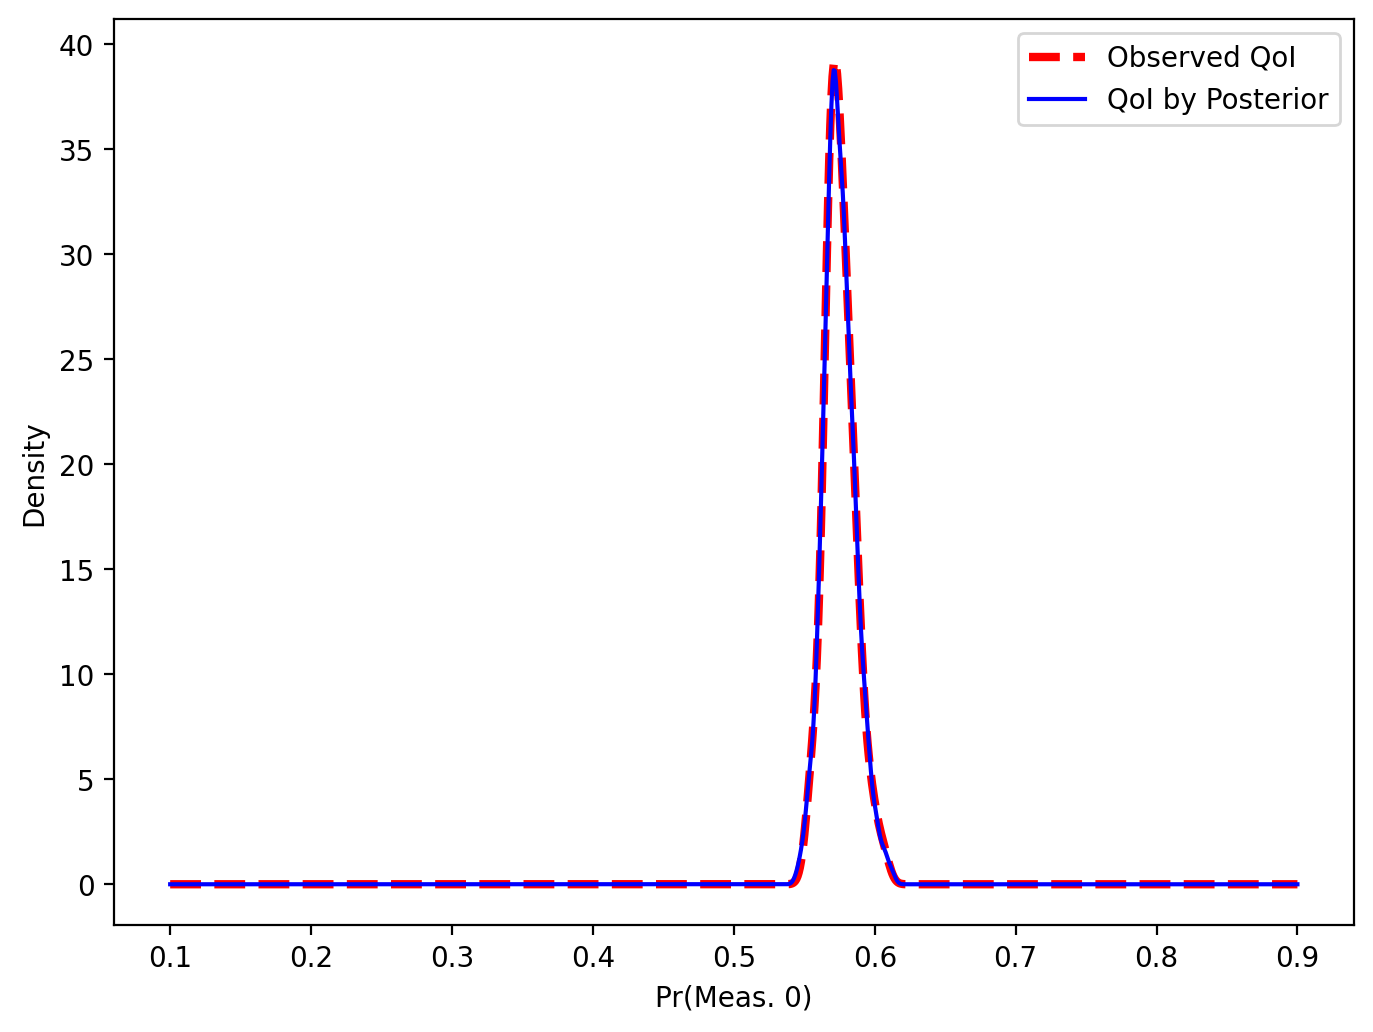

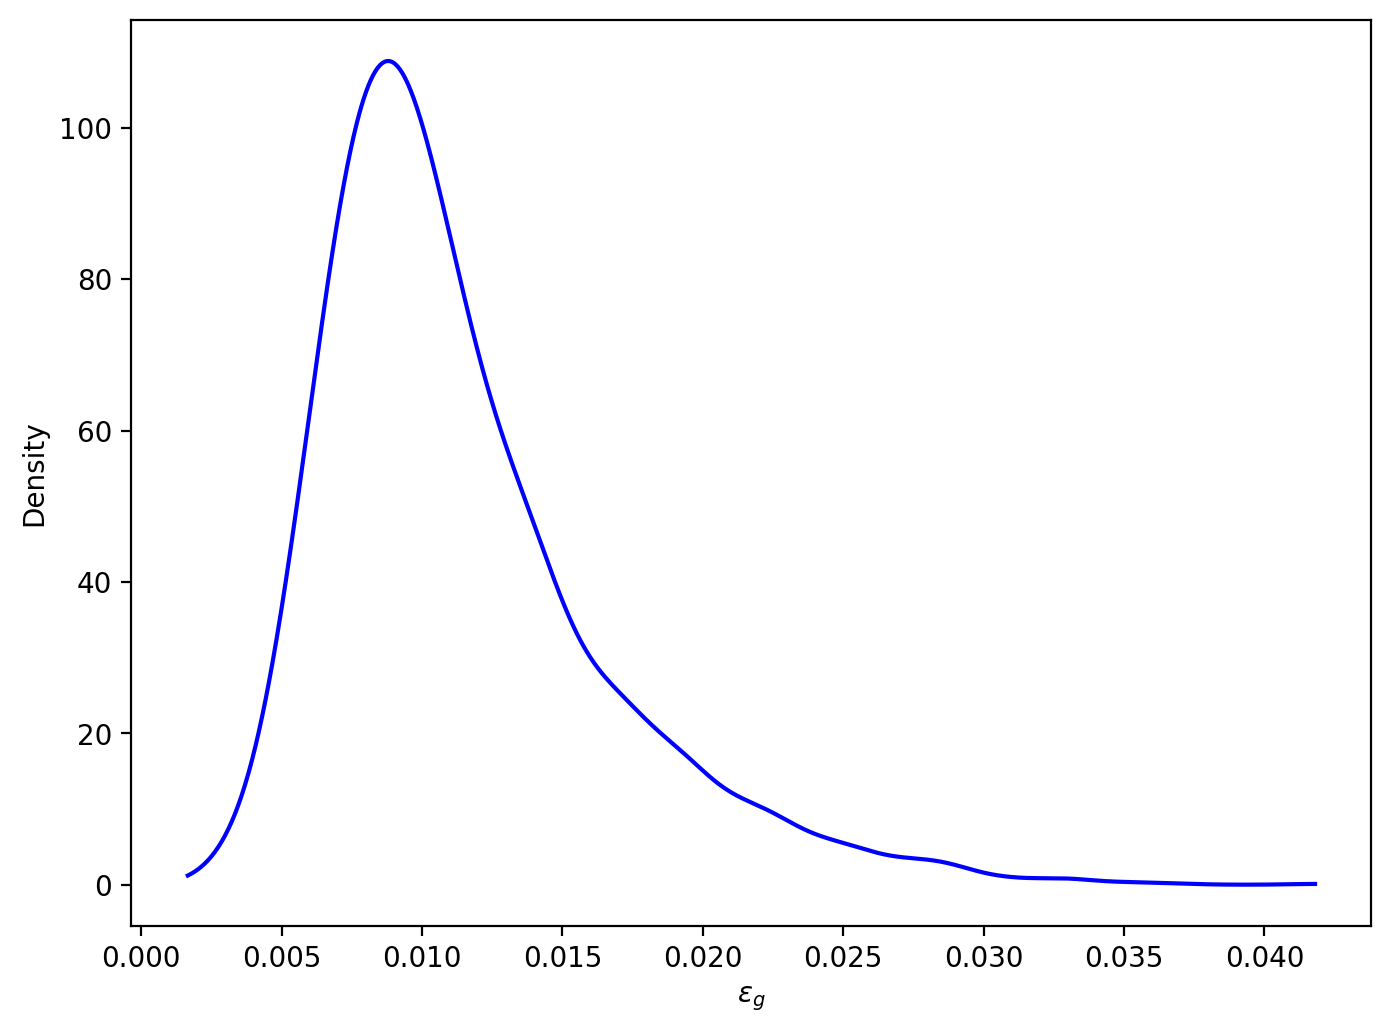

Qubit  2
Given Lambdas [0.977      0.964      0.00247759]
Final Accepted Posterior Lambdas
M: 10.8036 Index: 19407 pi_obs = 29.0682 pi_Q(prior) = 2.6906
Accepted Number N: 3730, fraction 0.093
I(pi^post_Lambda) = 1
Posterior Lambda Mean [0.92292681 0.88564568 0.00760882]
Posterior Lambda Mode [0.97704111 0.94849751 0.00658269]
0 to 1: KL-Div(pi_D^Q(post),pi_D^obs) = 0.00271499
0 to 1: KL-Div(pi_D^obs,pi_D^Q(post)) =    inf


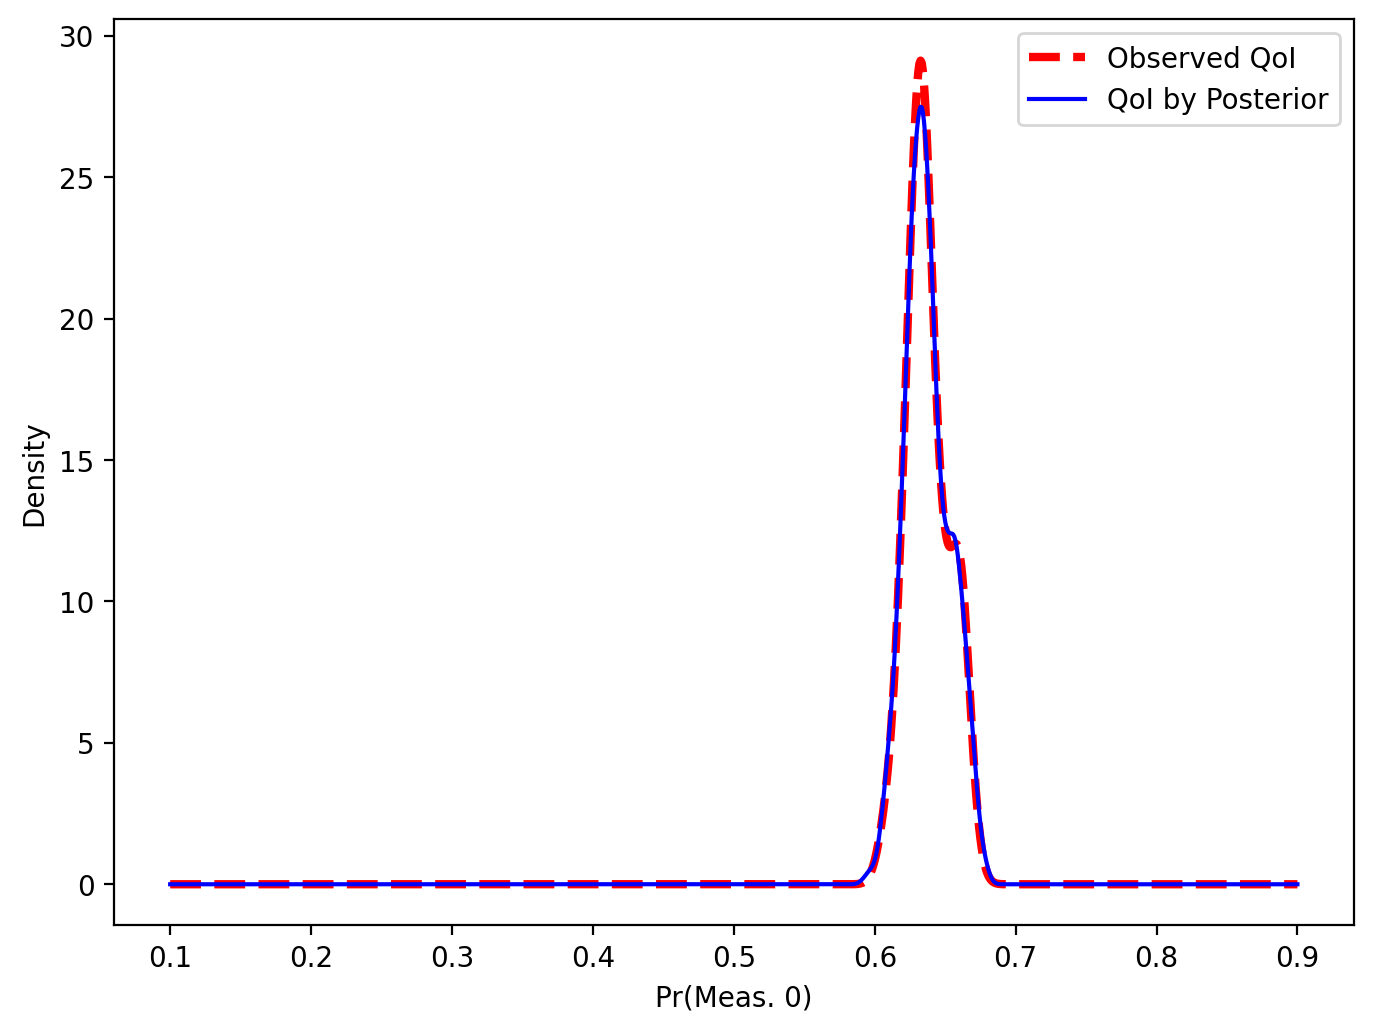

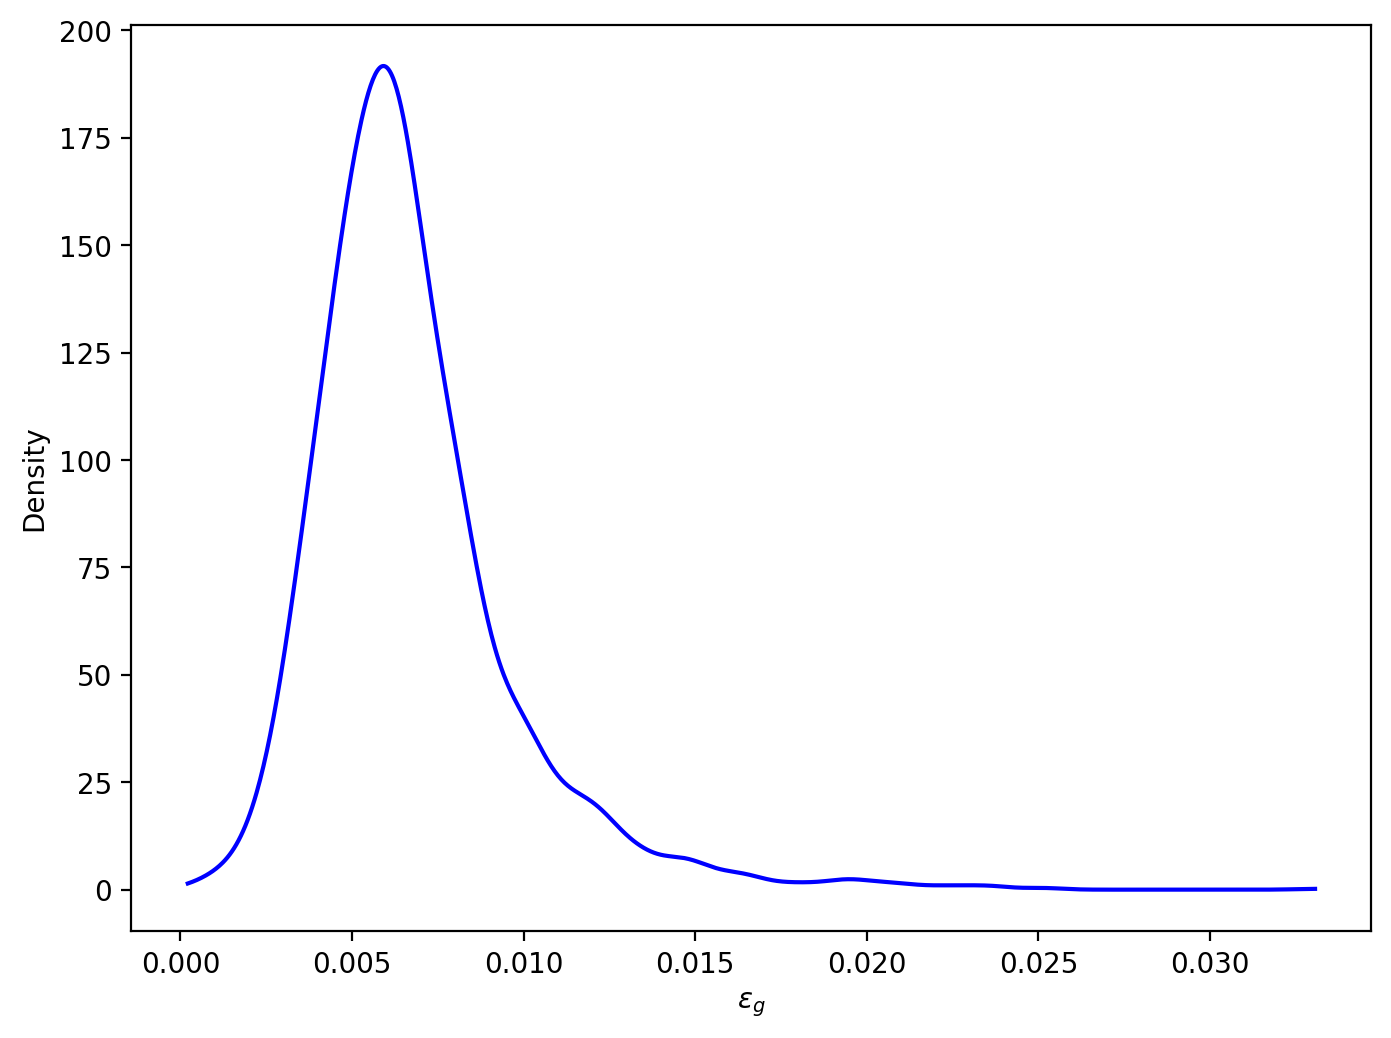

In [4]:
import seaborn as sns
import pandas as pd

M = 40000
gate_sd = 0.01
meas_sd = 0.1
info = {}

params = read_params(file_address = noise_file_address)
for q in interested_qubits:
    print('Qubit ',q)
    data = read_data(q, gate_type, gate_num, file_address = file_address)
    d = getData0(data, int(itr*shots/2048), q)
    _,post_lambdas = output_gate(d, q, M, params, gate_sd, meas_sd, gate_type, gate_num, file_address = file_address, write_data_for_SB = True)
    info['Qubit' + str(q)] = post_lambdas

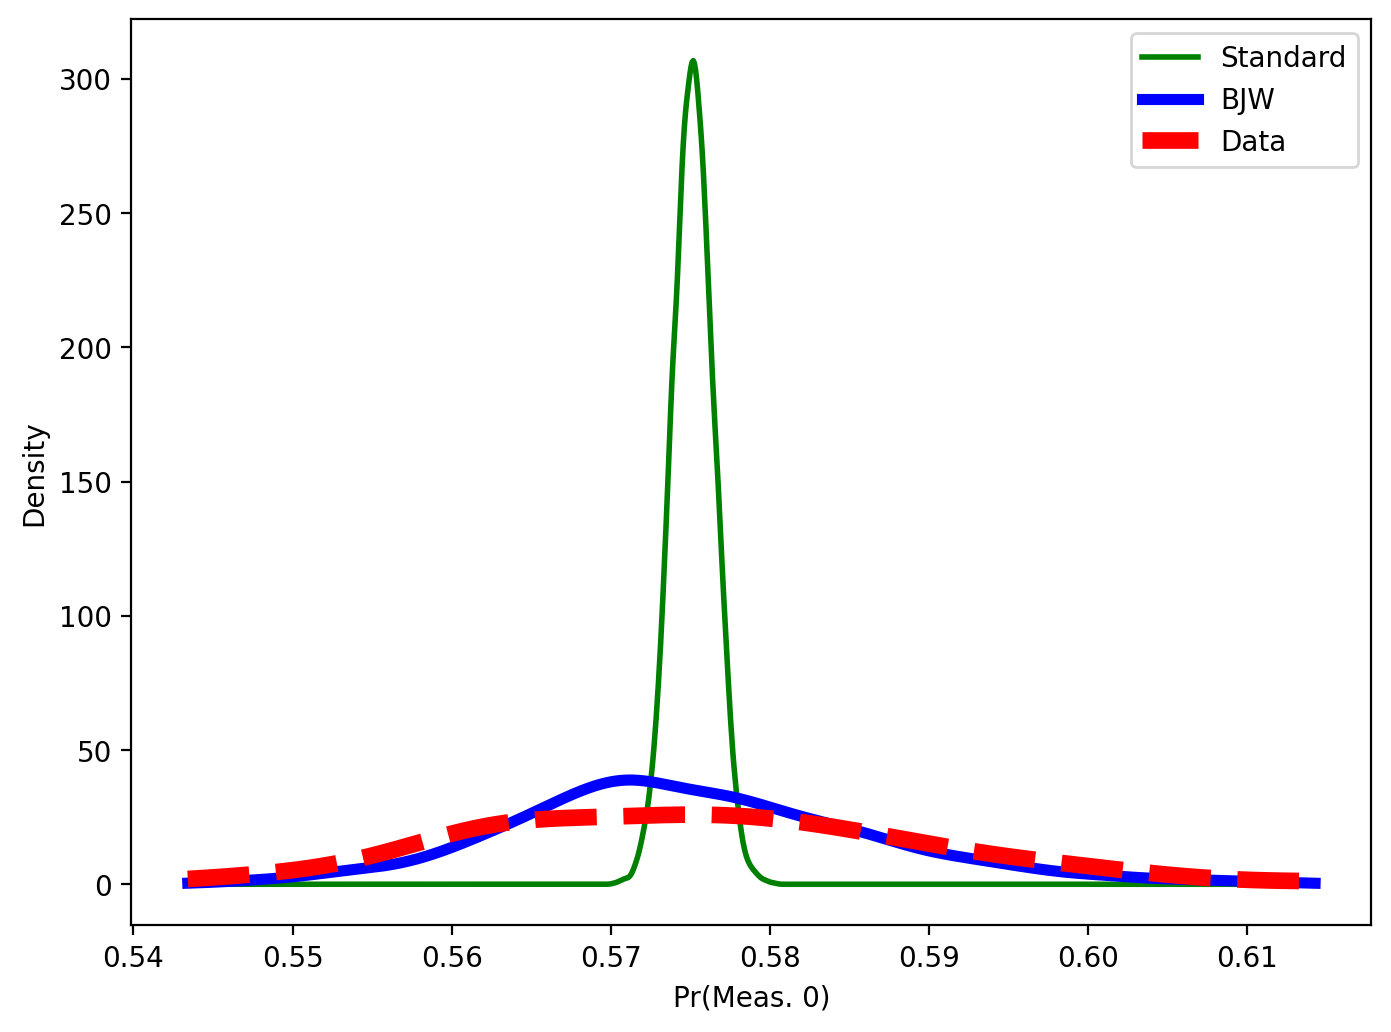

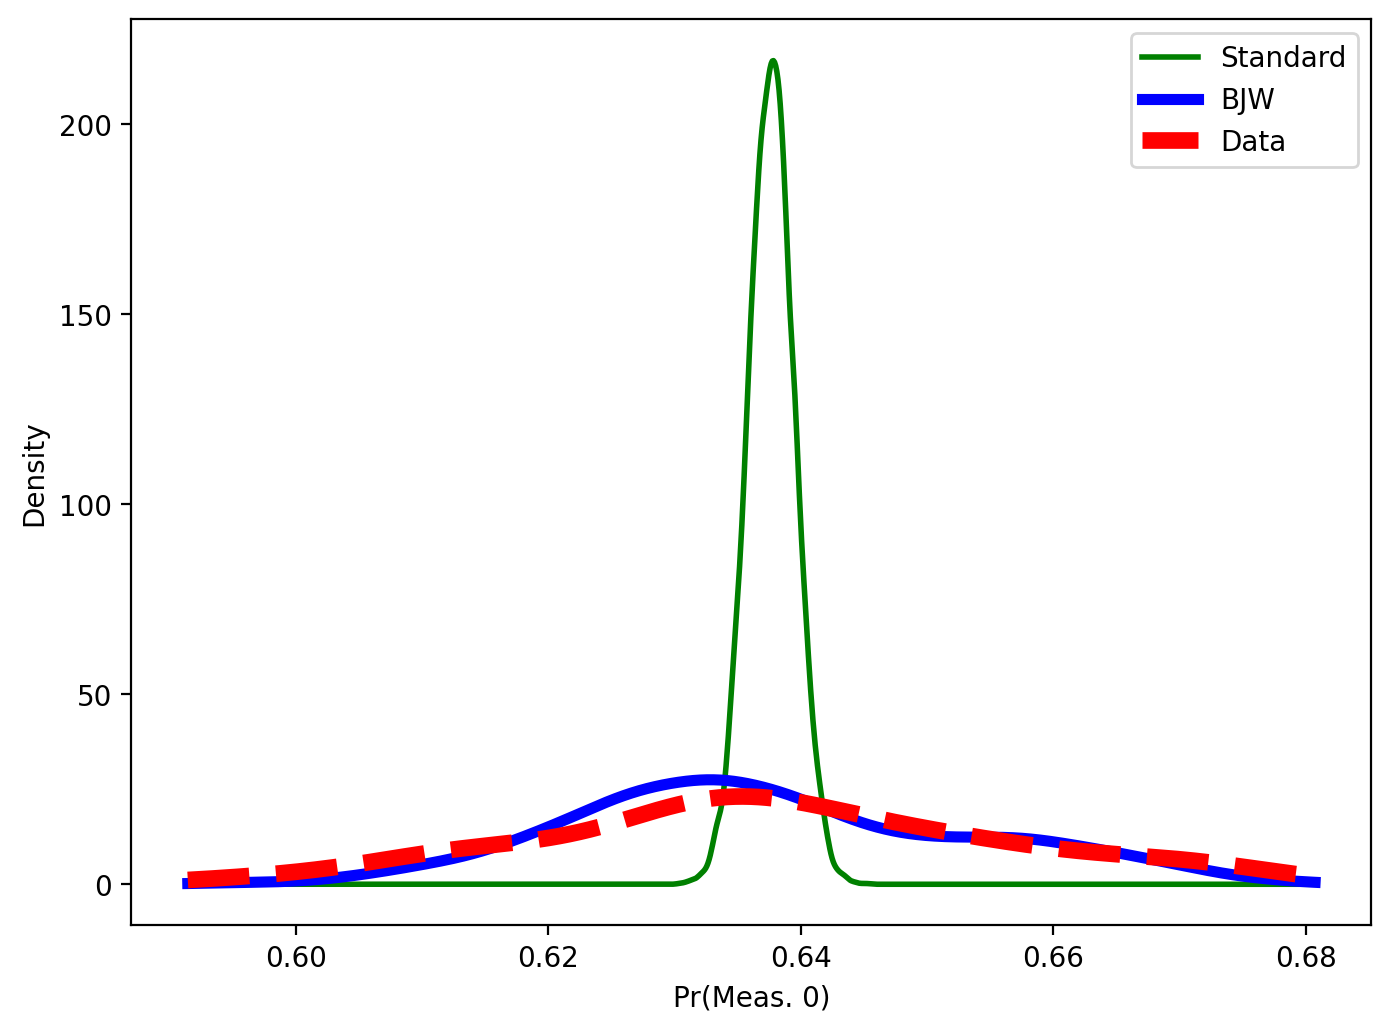

In [5]:
from gatesimu import plotComparsion
for q in interested_qubits:
    d = getData0(read_data(q, gate_type, gate_num, file_address = file_address), int(itr*shots/1024), q)
    plotComparsion(d, info['Qubit'+str(q)], q, file_address = file_address)

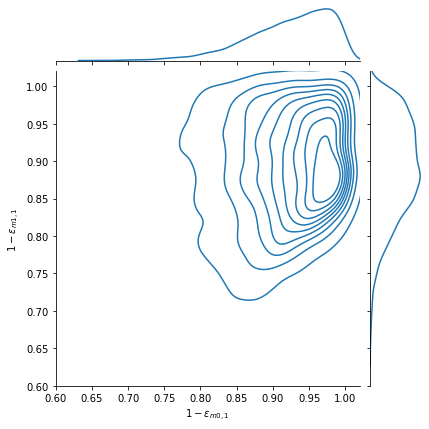

In [6]:
import seaborn as sns
qubit_num = 1
our_q1 = pd.DataFrame(info['Qubit' + str(qubit_num)],columns=['P0','P1','eps'])
sns_plot = sns.jointplot(x="P0", y="P1", data=our_q1, kind="kde", xlim=(0.6,1.02), ylim=(0.6,1.02)).set_axis_labels('$1 - \epsilon_{m0,1}$', '$1 - \epsilon_{m1,1}$')
sns_plot.fig.savefig(noise_file_address + 'p0p1-Qubit{}.jpg'.format(qubit_num)) 

In [7]:
import numpy as np
from measfilter import closest_average, closest_mode
q = 1
postSB = pd.read_csv(file_address + 'StandPostQubit{}.csv'.format(q)).to_numpy()
print(np.mean(postSB,axis = 0))
print(closest_average(postSB))
print(closest_mode(postSB))

[0.92553809 0.89949576 0.01083814]
[0.92590761 0.8994287  0.00942002]
[0.98172823 0.93197418 0.01091926]


In [8]:
q = 2
postSB = pd.read_csv(file_address + 'StandPostQubit{}.csv'.format(q)).to_numpy()
print(np.mean(postSB,axis = 0))
print(closest_average(postSB))
print(closest_mode(postSB))

[0.92334468 0.88517089 0.00668199]
[0.92304778 0.88614277 0.00612117]
[0.98172053 0.91968908 0.00714264]
